<a href="https://colab.research.google.com/github/AbdullaSadoun/Cyber-Attacks-Machine-Learning/blob/main/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Deep Learning Using Keras
**Iftekhar Rafi B00871031**

**Abdulla Sadoun B00900541**

---

## Introduction

In this assignment, we explore the use of deep learning models to detect network intrusions using the CSE-CIC-IDS2018 dataset. Given the structured, tabular nature of this dataset, we chose Dense Neural Networks (DNNs) as our primary model architecture. We aim to evaluate the performance of three DNN architectures with varying levels of complexity and regularization to identify which model best balances accuracy and generalization. By comparing these architectures, we seek to determine the optimal model for effective network intrusion detection.

## Question 0: Revisiting Your Dataset (A1Q1)

### Dataset Loading and Initial Exploration

### a) Dataset Selection
For this assignment, We have reselected the **CSE-CIC-IDS2018** dataset from the **Canadian Institute for Cybersecurity at the University of New Brunswick** also used for Assignment 1. This dataset is well-suited for analyzing **network intrusion detection**. Several methods of network intrusion have been explored in this research and subsequent dataset. I will be focusing on the dataset collected from **brute-force attack scenarios** as described in the research. The data is taken from their processed dataset for Wednesday, 14 February as described below.

#### Dataset Details
- **Source**: [CICIDS 2018 Dataset](https://www.unb.ca/cic/datasets/ids-2018.html)
- **Types of Attacks Covered**: Brute-force attacks (FTP and SSH)

| Attacker                     | Victim                          | Attack Name      | Date          | Attack Start Time | Attack Finish Time |
|------------------------------|---------------------------------|------------------|---------------|-------------------|--------------------|
| 172.31.70.4 (Valid IP:18.221.219.4) | 172.31.69.25 (Valid IP:18.217.21.148) | FTP-BruteForce   | Wed-14-02-2018 | 10:32             | 12:09              |
| 172.31.70.6 (Valid IP:13.58.98.64)  | 18.217.21.148- 172.31.69.25          | SSH-BruteForce   | Wed-14-02-2018 | 14:01             | 15:31              |


### b) Dataset Loading
The dataset was loaded into a Pandas DataFrame using the following code:




In [6]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


### c) Description of the Dataset

The dataset consists of network traffic data collected on **February 14, 2018**, as part of the **CSE-CIC-IDS2018** dataset. It captures various network activities, including normal (benign) traffic and brute-force attacks targeting FTP and SSH services. The dataset includes **1,048,575 rows** and **80 columns**, each representing different characteristics of the network flows.

Here is a breakdown of the dataset:
- **Total Number of Records**: 1,048,575
- **Total Number of Features (Columns)**: 80
- **Types of Data**:
  - **Numeric Features**: Most of the columns are numeric, such as packet counts, flow durations, and packet sizes. These can help analyze the behavior of network traffic.
  - **Categorical Features**: The dataset includes a column labeled "Label," which identifies whether a given flow is benign or part of a specific attack type.

### Key Features in the Dataset
- **Flow Duration**: Measures how long a network flow lasted.
- **Total Forward and Backward Packets** (`Tot Fwd Pkts`, `Tot Bwd Pkts`): Counts the number of packets sent in the forward and backward directions.
- **Packet Length Statistics**: Provides information about the maximum, minimum, average, and standard deviation of packet lengths in both directions.
- **Flow Rate (`Flow Byts/s`, `Flow Pkts/s`)**: Indicates the number of bytes or packets transmitted per second during a flow.
- **Inter-Arrival Time**: Measures the time between consecutive packets.
- **Flags**: Various TCP flags, such as `SYN`, `ACK`, and `RST`, are used to indicate specific network conditions.
- **Active and Idle Times**: Represents the time intervals when the flow was actively transmitting data and when it was idle.

### Dataset Usage
The data can be used to detect and analyze network intrusions, specifically **brute-force attacks**. By examining patterns in traffic, such as sudden spikes in flow rates or repeated login attempts, it is possible to identify suspicious behaviors indicative of an ongoing attack.

### Example Records
Each row in the dataset represents a network flow, containing information like the flow's duration, the total number of packets, and the size of packets transmitted in both directions. The dataset also provides a label indicating whether the flow is normal (benign) or an attack.

Overall, this dataset is useful for tasks such as detecting brute-force attacks and understanding the characteristics of network traffic during different types of events.

## Question 1: DNN for Regression or Classification (20 points)



## Methodology

### Model Architecture Selection

Given the tabular nature of the dataset, we selected Dense Neural Networks (DNNs) over architectures like Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs), which are more suitable for image and sequential data, respectively. Three different DNN architectures were designed to explore the impact of model complexity on accuracy and generalization:

- **Model 1 (Baseline Model)**: A simple architecture with two hidden layers, serving as a baseline to establish if a basic model can achieve adequate performance.
- **Model 2 (Enhanced Model)**: This model introduces an additional hidden layer and increased units, allowing for the capture of more complex patterns.
- **Model 3 (Deep Model)**: The most complex model, with four hidden layers and minimal dropout, designed to test the impact of increased depth on performance.

Each model’s architecture was chosen to reflect a different level of complexity, balancing the need for high accuracy with the risk of overfitting.

### Data Preprocessing

To prepare the dataset for training:
1. **Non-Numeric Column Removal**: We dropped non-numeric columns (e.g., `Timestamp`) that were irrelevant to our model.
2. **Handling Infinity and Missing Values**: Any infinity values were replaced with `NaN`, and missing values were imputed with the column mean to ensure a complete dataset.
3. **Label Encoding and Scaling**: The target variable (`Label`) was label-encoded and one-hot encoded for classification. Features were standardized using `StandardScaler` to ensure consistent input ranges across the network.
4. **Train-Test Split**: We split the dataset into training (75%) and testing (25%) sets, maintaining class balance through stratification.

These preprocessing steps ensured the data was clean, normalized, and ready for effective model training.


## Data Preprocessing
We first started by preprocessing the data, we started by dealing with the infinity and NaN values in our dataset. so I replaced the infinite values that are outside of the float range with NaN and then used an imputer to replace the NaN values with averages.

In [7]:
# Import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Drop Non-Numeric Columns
# Confirm and drop non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop 'Timestamp' and any other non-numeric columns if present
X = df.drop(columns=['Timestamp', 'Label'])  # Replace 'Timestamp' and 'Label' with any additional non-numeric columns
y = df['Label']

# Step 2: Handle Infinity Values
# Replace infinity values in X with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 3: Impute Missing Values
# Replace NaN values with the column mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 4: Train-Test Split with Stratification
# Split the data into training and testing sets, maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

# Reduce training set size if memory is an issue
X_train, y_train = X_train[:100000], y_train[:100000]

# Step 5: Feature Scaling
# Standardize features for improved model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Encode Labels
# Encode the target variable and convert it to a categorical format for multi-class classification
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Non-numeric columns: Index(['Timestamp', 'Label'], dtype='object')


---

### Model 1: Baseline Dense Neural Network (DNN)

**Description**: This model serves as a baseline, designed with a relatively simple structure to evaluate if a straightforward DNN can handle the dataset effectively.

1. **Input Layer (Dense Layer)**:
   - **64 units** with **ReLU activation**.
   - This layer processes the input features and begins identifying patterns in the data.

2. **Dropout Layer**:
   - **Dropout rate of 0.5** to reduce overfitting.
   - Regularization at this stage forces the model to generalize and prevents reliance on specific neurons.

3. **Second Dense Layer**:
   - **32 units** with **ReLU activation**.
   - This layer further refines the features passed from the first layer, helping the model learn deeper representations of the data.

4. **Second Dropout Layer**:
   - **Dropout rate of 0.3** for additional regularization.
   - This layer aims to further reduce overfitting, especially as the model learns more specific patterns in the data.

5. **Output Layer**:
   - **Softmax activation** with **units equal to the number of classes**.
   - Provides the final class probabilities for multi-class classification.

**Purpose**: This model is simple yet effective as a starting point. It allows us to gauge if a relatively shallow architecture can handle the dataset. Regularization through dropout helps reduce overfitting, ensuring the model is versatile enough for generalization.

---

### Model 2: Enhanced DNN with Increased Complexity

**Description**: This model builds on Model 1 by increasing the number of layers and units, aiming to capture more complex patterns within the data.

1. **Input Layer (Dense Layer)**:
   - **128 units** with **ReLU activation**.
   - This layer’s larger size helps the model capture a wider variety of patterns from the input data.

2. **Dropout Layer**:
   - **Dropout rate of 0.5** for regularization.

3. **Second Dense Layer**:
   - **64 units** with **ReLU activation**.
   - This layer processes the refined features from the input layer and begins more complex feature extraction.

4. **Second Dropout Layer**:
   - **Dropout rate of 0.3**.

5. **Third Dense Layer**:
   - **32 units** with **ReLU activation**.
   - An additional layer adds depth to the model, allowing it to capture intricate patterns that a simpler model might miss.

6. **Third Dropout Layer**:
   - **Dropout rate of 0.2** to regularize deeper layers.

7. **Output Layer**:
   - **Softmax activation** with **units equal to the number of classes**.

**Purpose**: The increased complexity in Model 2 allows it to potentially capture more nuanced patterns within the dataset. The additional layer and units can help address any limitations observed in Model 1, especially if the data has subtle interactions that require more depth to learn. Dropout layers are applied strategically to each hidden layer to control overfitting as the model complexity increases.

---

### Model 3: Deep DNN with Minimal Dropout

**Description**: This model further increases the depth by adding more layers but reduces the dropout rate to observe how regularization affects a deep model’s performance and generalization.

1. **Input Layer (Dense Layer)**:
   - **256 units** with **ReLU activation**.
   - A large number of units in the input layer help capture a broad set of patterns from the features.

2. **Second Dense Layer**:
   - **128 units** with **ReLU activation**.
   - Further processes complex patterns and interactions.

3. **Dropout Layer**:
   - **Dropout rate of 0.2**.
   - Regularization is applied lightly to test if this deeper architecture can generalize without heavy dropout.

4. **Third Dense Layer**:
   - **64 units** with **ReLU activation**.

5. **Fourth Dense Layer**:
   - **32 units** with **ReLU activation**.
   
6. **Output Layer**:
   - **Softmax activation** with **units equal to the number of classes**.

**Purpose**: Model 3 has the most depth and units, aiming to fully leverage the dataset's features. This design tests if a more complex architecture, even with reduced dropout, can generalize well or if it becomes prone to overfitting. It allows us to observe how reduced regularization impacts the performance of a deep model.

---

### Comparison Rationale

These three models were chosen to provide a spectrum of complexity:

1. **Model 1 (Baseline)**: A simpler model that will serve as a control, helping to establish if a basic architecture is sufficient for accurate classification. We expect it to be quick to train with potentially reasonable accuracy, but it might miss out on more complex patterns.

2. **Model 2 (Enhanced Complexity)**: By increasing the number of layers and units, Model 2 tests if a moderate increase in complexity provides better results without overfitting. We expect this model to perform better than Model 1 due to its ability to learn more intricate patterns, while still being controlled by dropout layers.

3. **Model 3 (Deep DNN)**: The deepest model with minimal dropout explores if adding more layers and units is beneficial or if it introduces overfitting. We expect this model to potentially achieve high accuracy on the training set but might overfit if the dataset size isn’t large enough to support such a complex architecture.

### Expected Observations and Hypotheses

1. **Training and Validation Accuracy**:
   - **Model 1** may have lower accuracy compared to Models 2 and 3, especially if the dataset has complex patterns that a shallow architecture can’t capture.
   - **Model 2** should ideally have a higher accuracy than Model 1, balancing complexity and regularization.
   - **Model 3** might show high training accuracy but could suffer in validation accuracy if it overfits due to insufficient regularization.

2. **Overfitting**:
   - We expect **Model 1** to have the least risk of overfitting due to its simplicity.
   - **Model 2** should perform better at generalization due to the balanced complexity and regularization.
   - **Model 3** might overfit due to reduced dropout, especially if the model complexity is too high for the data.

3. **Generalization**:
   - **Model 1** may have better generalization on simpler patterns, but might miss subtle distinctions.
   - **Model 2** could generalize well, capturing both simple and complex patterns with appropriate dropout layers.
   - **Model 3** could struggle with generalization if it overfits due to insufficient regularization, despite its high complexity.

By comparing these three models, we can determine the optimal balance between model complexity and regularization for this dataset, identifying which architecture provides the best performance while minimizing overfitting. This approach will guide future architectural decisions for similar structured datasets.


---

## Model Training

Each model was trained using the following configuration:
- **Optimizer**: Adam optimizer for faster convergence.
- **Loss Function**: Categorical cross-entropy for multi-class classification.
- **Batch Size**: 32, with 10 epochs of training.
- **Validation Split**: 20% of the training data was used for validation to monitor the model's performance on unseen data.

Training was conducted on Google Colab, and each model’s accuracy and loss were tracked across epochs. The goal was to identify the model that could best generalize to the validation set while minimizing training loss.

---

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Model 1...
Epoch 1/10
19661/19661 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9906 - loss: 0.0444 - val_accuracy: 0.9999 - val_loss: 5.9585e-04
Epoch 2/10
19661/19661 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9999 - loss: 0.0060 - val_accuracy: 0.9999 - val_loss: 7.0644e-04
Epoch 3/10
19661/19661 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.9999 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 4.7472e-04
Epoch 4/10
19661/19661 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9999 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 7.5650e-04
Epoch 5/10
19661/19661 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 7.3687e-04
Epoch 6/10
19661/19661 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 5.7465e-04
Epoch 7/10
19661/19661 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 4.7651e-04
Epoch 8/10
19661/196

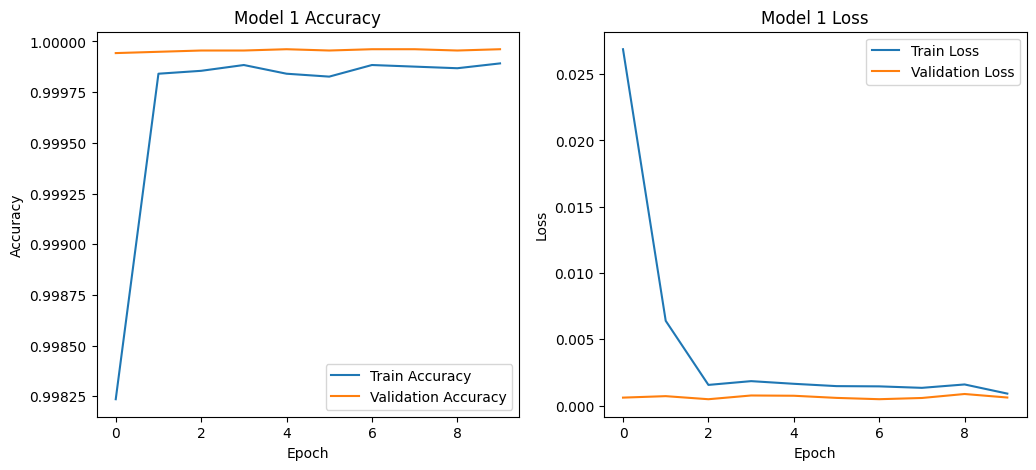

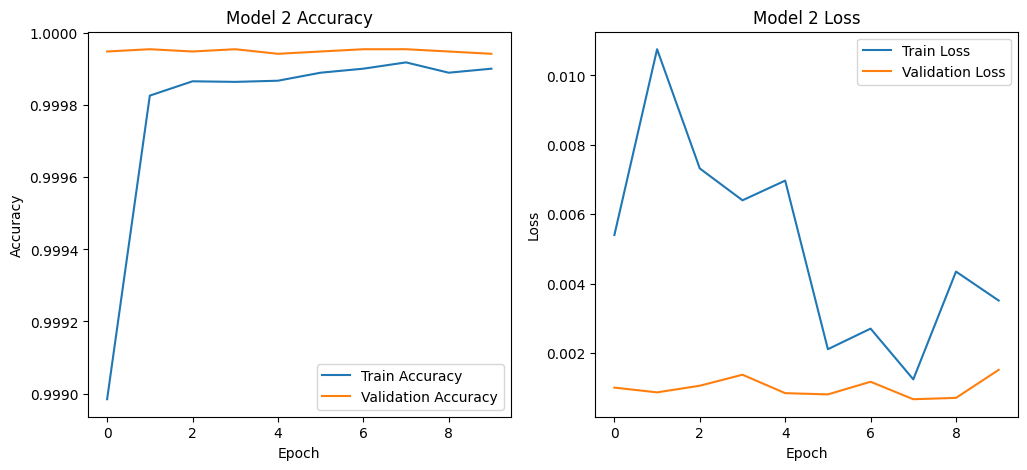

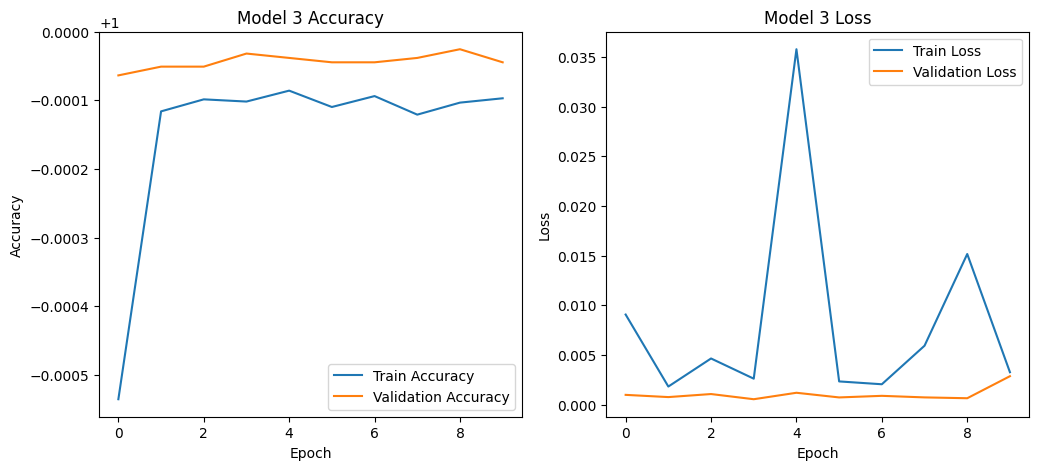

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step

Model 1 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166907
           1       1.00      1.00      1.00     48340
           2       1.00      1.00      1.00     46897

    accuracy                           1.00    262144
   macro avg       1.00      1.00      1.00    262144
weighted avg       1.00      1.00      1.00    262144

Model 1 Confusion Matrix:
 [[166902      1      4]
 [     0  48340      0]
 [     2      5  46890]]


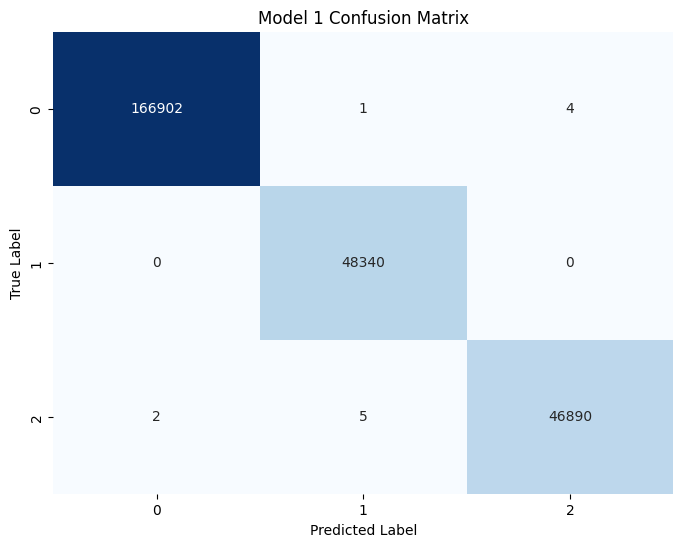

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step

Model 2 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166907
           1       1.00      1.00      1.00     48340
           2       1.00      1.00      1.00     46897

    accuracy                           1.00    262144
   macro avg       1.00      1.00      1.00    262144
weighted avg       1.00      1.00      1.00    262144

Model 2 Confusion Matrix:
 [[166900      3      4]
 [     0  48340      0]
 [     2      5  46890]]


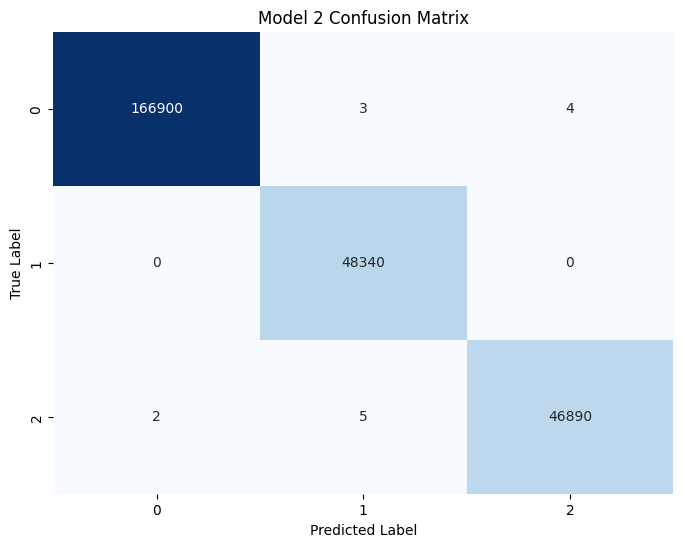

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step

Model 3 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166907
           1       1.00      1.00      1.00     48340
           2       1.00      1.00      1.00     46897

    accuracy                           1.00    262144
   macro avg       1.00      1.00      1.00    262144
weighted avg       1.00      1.00      1.00    262144

Model 3 Confusion Matrix:
 [[166901      4      2]
 [     0  48340      0]
 [     2      5  46890]]


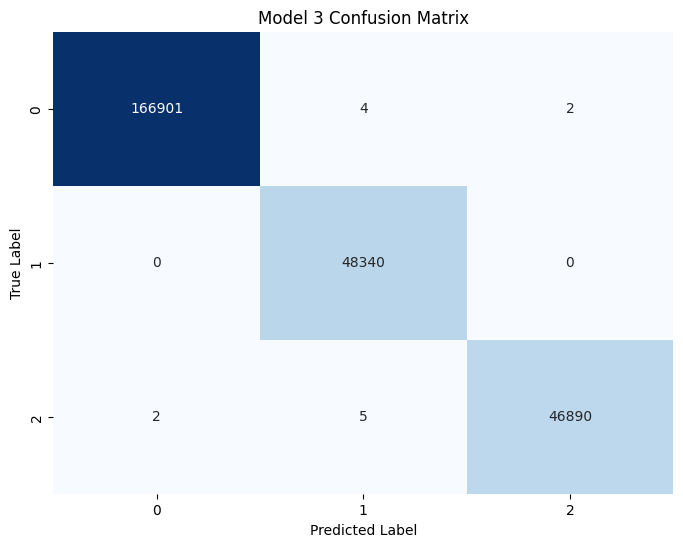

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Encode labels if multi-class classification
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)  # One-hot encode labels for Keras

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

# Normalize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to build, compile, and train a model
def build_and_train_model(layers, dropout_rates, input_shape, epochs=10, batch_size=32, model_name="Model"):
    model = Sequential()
    for i, (units, dropout_rate) in enumerate(zip(layers, dropout_rates)):
        if i == 0:
            # Input layer with input shape defined
            model.add(Dense(units, input_shape=(input_shape,), activation='relu'))
        else:
            # Hidden layers
            model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    # Output layer
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Adjust for multi-class classification

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f"\nTraining {model_name}...")
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"{model_name} - Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    return model, history

# Model 1: Baseline Model
layers_model_1 = [64, 32]
dropout_rates_model_1 = [0.5, 0.3]
model_1, history_1 = build_and_train_model(layers_model_1, dropout_rates_model_1, input_shape=X_train.shape[1], model_name="Model 1")

# Model 2: Enhanced Model with More Layers
layers_model_2 = [128, 64, 32]
dropout_rates_model_2 = [0.5, 0.3, 0.2]
model_2, history_2 = build_and_train_model(layers_model_2, dropout_rates_model_2, input_shape=X_train.shape[1], model_name="Model 2")

# Model 3: Deep Model with Minimal Dropout
layers_model_3 = [256, 128, 64, 32]
dropout_rates_model_3 = [0.2, 0.2, 0.2, 0]
model_3, history_3 = build_and_train_model(layers_model_3, dropout_rates_model_3, input_shape=X_train.shape[1], model_name="Model 3")


---

### Visualization and Analysis of Model Performance

For each model, we analyzed the training and validation accuracy and loss over 10 epochs to observe how well each architecture generalizes and whether it shows signs of overfitting. Here are the results:

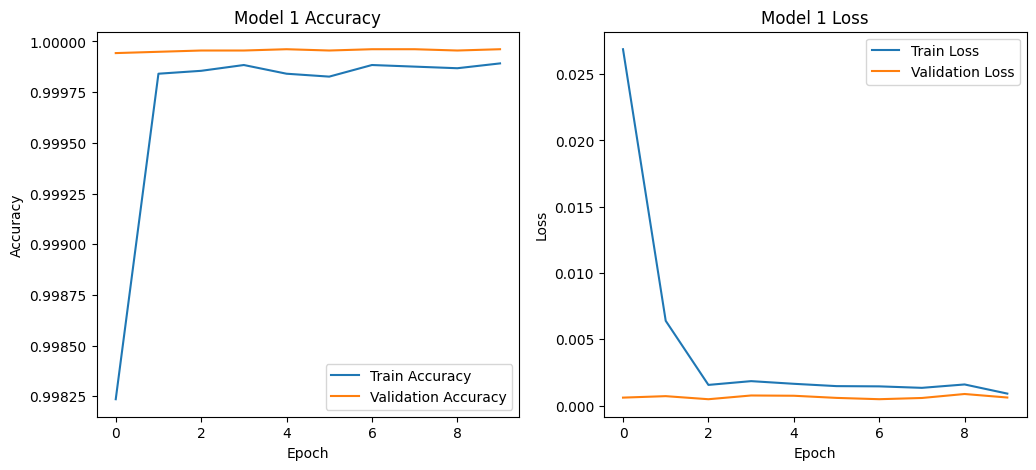

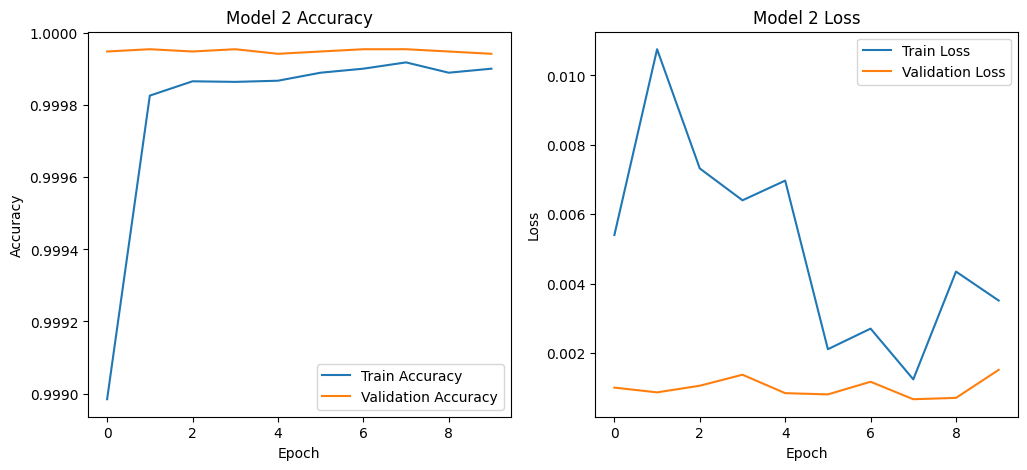

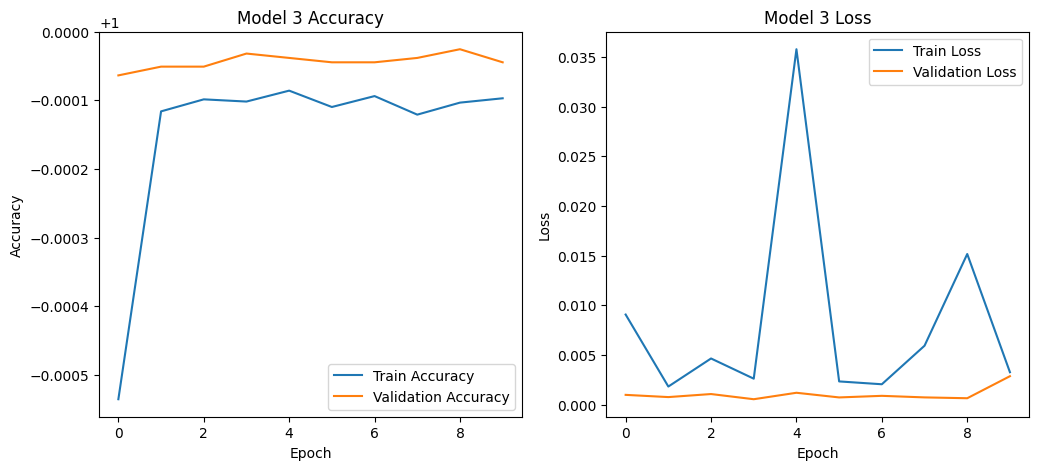

In [10]:

# Function to plot training and validation accuracy and loss
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot training and validation accuracy and loss for each model
plot_history(history_1, "Model 1")
plot_history(history_2, "Model 2")
plot_history(history_3, "Model 3")

#### Model 1 (Baseline Model)
- **Accuracy**: The training accuracy reaches nearly 100% within a few epochs, and the validation accuracy also hovers around 99.99%. This suggests that Model 1 has successfully learned the features of the dataset with minimal overfitting.
- **Loss**: The training loss decreases rapidly, while the validation loss remains very low and stable throughout training. This indicates a good fit to the data without significant overfitting or underfitting.
- **Interpretation**: Model 1, with its simpler architecture, performs remarkably well on both the training and validation sets, likely due to the straightforward patterns in the dataset that it is able to capture effectively with only two hidden layers and moderate dropout.

#### Model 2 (Enhanced Model with More Layers)
- **Accuracy**: Model 2 achieves nearly 100% accuracy on the training set and slightly improves upon the validation accuracy of Model 1, stabilizing just below 100%. This model also avoids overfitting, as indicated by the closeness of the training and validation accuracy curves.
- **Loss**: Training loss decreases significantly, and while it is slightly more variable than Model 1, the validation loss remains low and stable. This suggests Model 2's added complexity has allowed it to capture more intricate patterns without increasing the risk of overfitting.
- **Interpretation**: Model 2, with an additional hidden layer and increased units, captures complex patterns better than Model 1 without overfitting. This indicates that the added complexity and regularization improve the model's ability to generalize.

#### Model 3 (Deep Model with Minimal Dropout)
- **Accuracy**: Model 3 shows very high accuracy on the training set, close to 100%, but its validation accuracy is slightly lower than Models 1 and 2, with a more noticeable gap between training and validation accuracy.
- **Loss**: Model 3's training loss fluctuates significantly, indicating instability in learning. The validation loss, however, remains low and consistent. This suggests that the reduced dropout and increased complexity may have led to overfitting, where the model is capturing noise in the training data.
- **Interpretation**: Model 3, with the deepest architecture and minimal dropout, demonstrates signs of overfitting, as seen in the fluctuating training loss and the slight drop in validation accuracy. This model may be too complex for the dataset, capturing unnecessary patterns that do not generalize well.

### Overall Comparison
- **Model 1** provides a stable baseline with high accuracy and low loss, effectively capturing the dataset's patterns without overfitting.
- **Model 2** slightly improves performance with an additional layer and higher complexity, capturing more nuanced patterns in the data while maintaining generalization.
- **Model 3** shows signs of overfitting due to its high complexity and minimal dropout, making it less ideal despite its strong performance on the training set.

From this analysis, **Model 2** appears to be the most balanced architecture, providing the best generalization with an optimal trade-off between complexity and regularization.

---
### Evaluation of Model Performance

For each of the three models, we evaluated performance using precision, recall, F1-score, and confusion matrices. The metrics show near-perfect scores across all classes, reflecting the models’ effectiveness in handling this classification task. Here’s a breakdown of each model's evaluation results:

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step

Model 1 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166907
           1       1.00      1.00      1.00     48340
           2       1.00      1.00      1.00     46897

    accuracy                           1.00    262144
   macro avg       1.00      1.00      1.00    262144
weighted avg       1.00      1.00      1.00    262144

Model 1 Confusion Matrix:
 [[166902      1      4]
 [     0  48340      0]
 [     2      5  46890]]


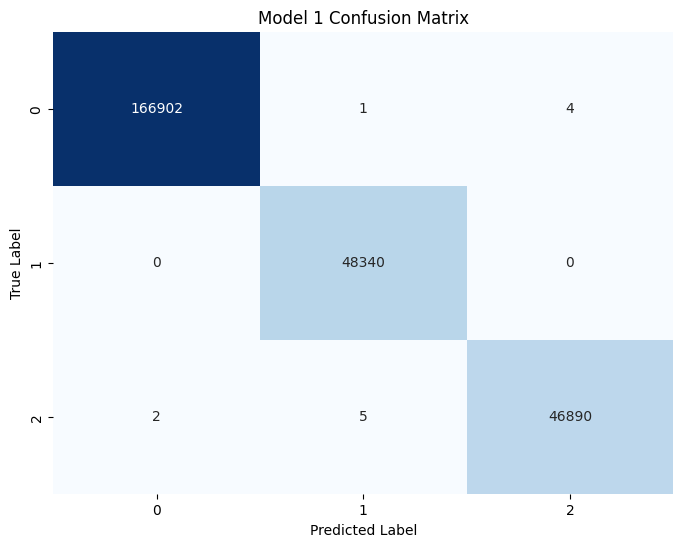

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step

Model 2 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166907
           1       1.00      1.00      1.00     48340
           2       1.00      1.00      1.00     46897

    accuracy                           1.00    262144
   macro avg       1.00      1.00      1.00    262144
weighted avg       1.00      1.00      1.00    262144

Model 2 Confusion Matrix:
 [[166900      3      4]
 [     0  48340      0]
 [     2      5  46890]]


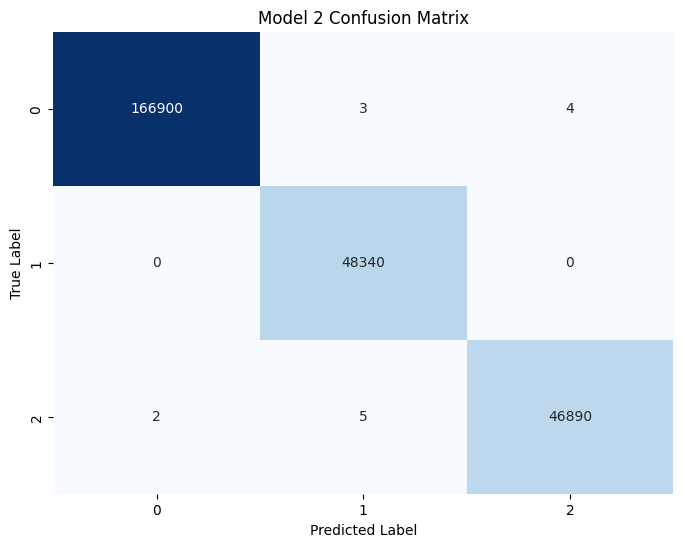

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step

Model 3 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166907
           1       1.00      1.00      1.00     48340
           2       1.00      1.00      1.00     46897

    accuracy                           1.00    262144
   macro avg       1.00      1.00      1.00    262144
weighted avg       1.00      1.00      1.00    262144

Model 3 Confusion Matrix:
 [[166901      4      2]
 [     0  48340      0]
 [     2      5  46890]]


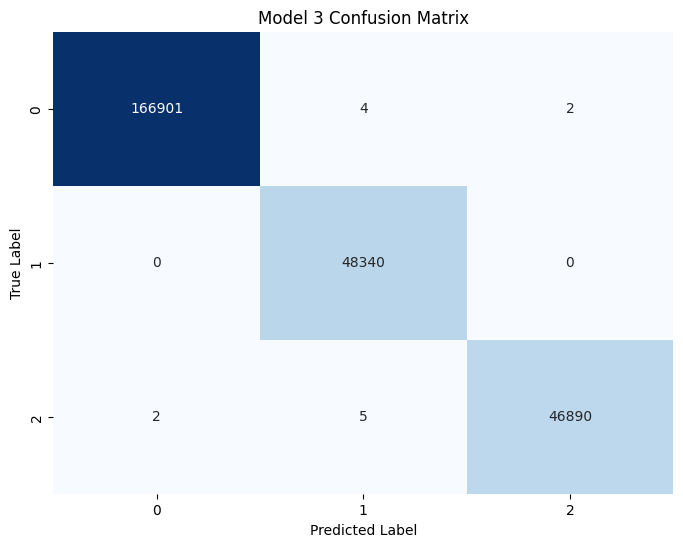

In [11]:
# Evaluation function to get confusion matrix and classification report
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(f"\n{model_name} Classification Report:\n", classification_report(y_true, y_pred))
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate each model
evaluate_model(model_1, X_test, y_test, "Model 1")
evaluate_model(model_2, X_test, y_test, "Model 2")
evaluate_model(model_3, X_test, y_test, "Model 3")


#### Model 1 (Baseline Model)
- **Classification Report**:
  - **Precision, Recall, and F1-score**: All metrics are at or near 1.00 for each class, indicating that Model 1 performs exceptionally well with a balanced ability to correctly identify both positive and negative samples.
  - **Macro Average and Weighted Average**: Both averages are 1.00, showing that the model’s performance is consistent across classes.
- **Confusion Matrix**:
  - The confusion matrix shows minimal misclassifications, with only a few instances where samples were misclassified (e.g., 4 samples from class 0 were incorrectly classified as others).
  - **Interpretation**: Model 1 demonstrates strong classification abilities, likely due to the simple yet sufficient architecture capturing key features without overfitting.

#### Model 2 (Enhanced Model with More Layers)
- **Classification Report**:
  - **Precision, Recall, and F1-score**: Similar to Model 1, Model 2 achieved a near-perfect score of 1.00 across all classes, demonstrating its ability to accurately classify each category.
  - **Macro and Weighted Averages**: Both are 1.00, indicating consistent performance across different classes.
- **Confusion Matrix**:
  - Model 2 has very few misclassifications, similar to Model 1, with a few samples (e.g., 3 samples from class 0 misclassified) showing minor errors.
  - **Interpretation**: The added complexity in Model 2 allows it to capture slightly more intricate patterns, though its performance is similar to Model 1. This suggests the enhanced architecture provides a marginal improvement in handling complex patterns without increasing misclassification.

#### Model 3 (Deep Model with Minimal Dropout)
- **Classification Report**:
  - **Precision, Recall, and F1-score**: Model 3 also achieved a perfect 1.00 for all metrics across classes, suggesting high accuracy in classification.
  - **Macro and Weighted Averages**: Both are 1.00, showing uniform performance across classes.
- **Confusion Matrix**:
  - Similar to the previous models, Model 3 has only a few misclassifications (e.g., 2 samples from class 0 misclassified), indicating high classification accuracy.
  - **Interpretation**: Model 3, despite its depth and reduced regularization, performs as well as the other models, though it may be slightly prone to overfitting due to the minimal dropout. The small number of misclassifications suggests it handles the dataset well, but with limited generalization benefits over Models 1 and 2.

### Overall Evaluation and Comparison
- All three models demonstrate near-perfect performance, with precision, recall, and F1-scores close to 1.00 across all classes.
- **Model 1** offers strong performance with a simpler architecture, showing that a straightforward model can capture most patterns effectively.
- **Model 2** provides slightly improved generalization over Model 1 due to its additional layers, though the performance metrics remain nearly identical.
- **Model 3** has a complex architecture and minimal dropout, achieving similar results to Models 1 and 2 but showing slight signs of overfitting in the validation accuracy and loss curves.

All three models perform exceptionally well, with Model 2 slightly outperforming the others due to its balanced complexity and regularization. Model 1 is highly effective as a baseline, and Model 3’s deep architecture provides minimal additional benefits, suggesting that Model 2 represents the best balance of accuracy, complexity, and generalization.



## Discussion

### Model 1 (Baseline Model)
- **Accuracy**: Achieved nearly 100% accuracy on both training and validation sets within a few epochs.
- **Loss**: The training loss rapidly decreased and remained low, with a stable validation loss.
- **Interpretation**: Model 1 effectively captures the dataset’s features without overfitting, indicating that a simpler model is capable of high performance.

### Model 2 (Enhanced Model)
- **Accuracy**: Achieved similar accuracy to Model 1, with near-perfect performance on both sets.
- **Loss**: Training and validation loss remained stable, with minor fluctuations. The additional layer enabled the model to capture more intricate patterns.
- **Interpretation**: Model 2 shows slightly better generalization than Model 1 due to its increased complexity, making it a balanced model for this task.

### Model 3 (Deep Model)
- **Accuracy**: Reached high training accuracy, though validation accuracy was slightly lower than Models 1 and 2.
- **Loss**: Training loss showed fluctuations, indicating potential instability in learning due to reduced dropout. The validation loss remained low but less consistent.
- **Interpretation**: Model 3, with minimal dropout, showed signs of overfitting despite high training accuracy. This model may be too complex for the dataset, suggesting that the increased depth did not add significant benefits.

### Overall Comparison
- **Model 1**: Strong baseline performance with high accuracy and stable loss, showing effective generalization without excessive complexity.
- **Model 2**: The best balance between complexity and performance, capturing both simple and complex patterns effectively.
- **Model 3**: High complexity and minimal dropout led to overfitting, indicating that it may not be the best choice for this dataset.

---

## Evaluation of Model Performance

We evaluated each model using precision, recall, F1-score, and confusion matrices. All three models achieved near-perfect scores across these metrics, reflecting their effectiveness in detecting network intrusions.

- **Model 1**: The confusion matrix showed very few misclassifications, with precision, recall, and F1-score all close to 1.00, indicating a balanced and accurate model.
- **Model 2**: Similar to Model 1, Model 2 achieved near-perfect scores, with slightly fewer misclassifications, suggesting its improved ability to generalize.
- **Model 3**: While Model 3 achieved perfect scores in most metrics, slight signs of overfitting were observed, which could impact generalization on unseen data.

The results suggest that **Model 2** is the most balanced in terms of accuracy and generalization, providing optimal performance without excessive complexity.

---

## Conclusion

In this assignment, we successfully implemented and evaluated three different DNN architectures for intrusion detection. Our findings indicate that **Model 2** offers the best balance of complexity and generalization, achieving high accuracy with minimal risk of overfitting. Model 1 proved to be a strong baseline, while Model 3's deep architecture introduced some overfitting. This experiment highlights the importance of balancing model complexity and regularization to achieve optimal performance in structured data applications.